# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [2]:
import pandas as pd

/Users/jsohn/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `craftcans.csv`, and look at the first first rows

In [3]:
df = pd.read_csv("craftcans.csv")
df.head(1)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50


## How many rows do you have in the data? What are the column types?

In [4]:
df.shape

(2416, 7)

In [5]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

In [6]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [265]:
import numpy as np

In [266]:
df.IBUs = df.IBUs.replace({'Does not apply': 0 })  

In [267]:
df.IBUs = df.IBUs.astype(float)

In [268]:
df.groupby('Brewery').IBUs.sum().sort_values(ascending = False).head(10)

Brewery
Oskar Blues Brewery              2099.0
Sun King Brewing Company         1373.0
Sixpoint Craft Ales              1230.0
Cigar City Brewing Company        873.0
21st Amendment Brewery            855.0
Hopworks Urban Brewery            798.0
Golden Road Brewing               781.0
Caldera Brewing Company           776.0
Southern Star Brewing Company     686.0
Surly Brewing Company             677.0
Name: IBUs, dtype: float64

## What is the most common ABV? (alcohol by volume)

In [269]:
df.ABV.value_counts().head(10)

5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
7.00%     92
4.50%     89
4.80%     72
5.80%     66
5.60%     66
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [271]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [279]:
df.ABV = df.ABV.str.replace('%','')  

In [280]:
df.ABV

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [281]:
df.ABV = df.ABV.astype(float)

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [283]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

<AxesSubplot:>

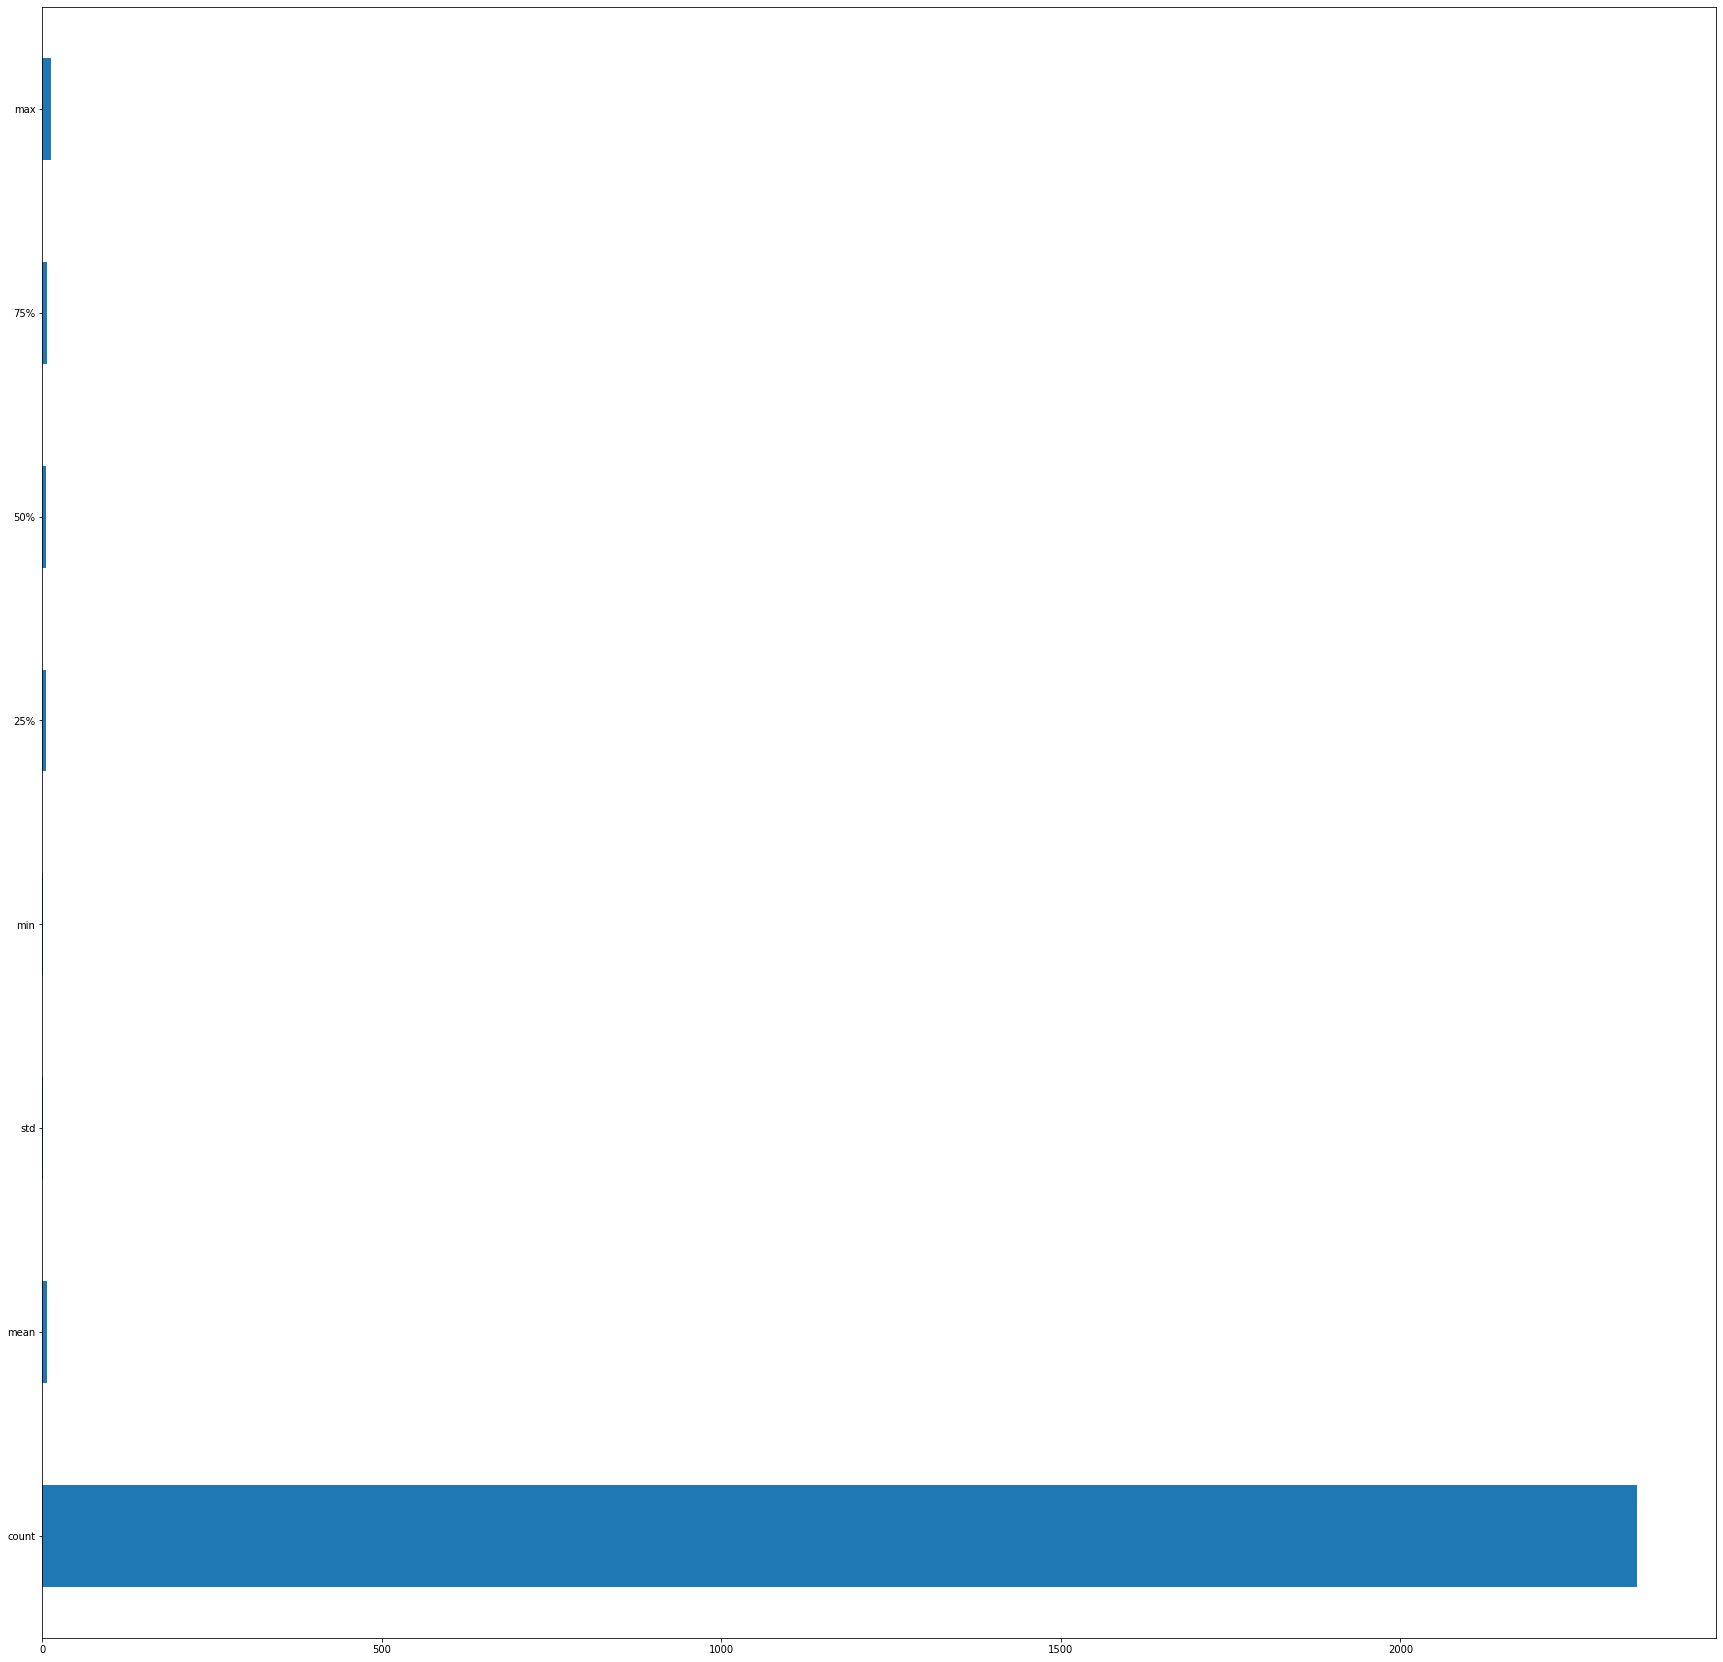

In [290]:
df.ABV.describe().plot(kind= 'barh', figsize = (30, 30) )

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [291]:
pd.notnull(df["ABV"]).count()

2416

In [292]:
df["ABV"].notnull().sum()
#count() doesn't work. Use sum()

2348

In [293]:
df["ABV"].isnull().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [294]:
df.groupby('Location').Beer.count().sort_values(ascending = False).head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Beer, dtype: int64

## List all of the beer from Brooklyn, NY

In [295]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,0.0
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,0.0
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,0.0
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [296]:
df[df.Location == 'Brooklyn, NY'].groupby('Brewery').Beer.count().sort_values(ascending = False)

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Beer, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [297]:
df[df.Brewery == 'Sixpoint Craft Ales'].groupby('Style').Beer.count().sort_values(ascending = False).head(5)

Style
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Name: Beer, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [298]:
df[df.Location.str.contains("NY$", na= False)].Brewery.value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
KelSo Beer Company                3
The Bronx Brewery                 3
Chatham Brewing                   2
Montauk Brewing Company           2
Bomb Beer Company                 2
Upstate Brewing Company           2
Dundee Brewing Company            1
Southampton Publick House         1
Newburgh Brewing Company          1
The Manhattan Brewing Company     1
Name: Brewery, dtype: int64

### Now *count* all of the breweries in New York state

In [299]:
df[df.Location.str.contains("NY$", na= False)].Brewery.value_counts().count()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [300]:
df[df.Style.str.contains(".*IPA.*", na= False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [301]:
df.IBUs.value_counts().head(10)
#The IBU data is cleaned above.

0.0     1005
20.0      82
35.0      60
65.0      54
30.0      53
70.0      48
18.0      46
25.0      45
60.0      44
40.0      41
Name: IBUs, dtype: int64

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [302]:
round(df.IBUs.mean(), 2)

24.9

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

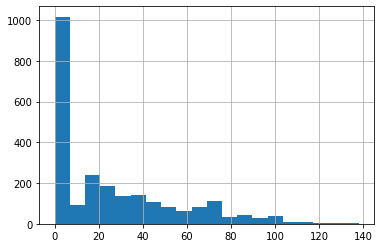

In [303]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [304]:
df.IBUs.describe()

count    2410.000000
mean       24.901245
std        28.919109
min         0.000000
25%         0.000000
50%        18.000000
75%        41.000000
max       138.000000
Name: IBUs, dtype: float64

In [305]:
df[df.IBUs > 41]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.6,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.2,42.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beers with IBUs below the 25th percentile

In [306]:
df[(df.IBUs > 0) & (df.IBUs <= 18)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0
...,...,...,...,...,...,...,...
2345,Fat Tire Amber Ale (2008),New Belgium Brewing Company,"Fort Collins, CO",American Amber / Red Ale,12 oz.,5.2,18.0
2363,Schlafly Summer Lager,Schlafly Brewing Company,"Saint Louis, MO",Munich Helles Lager,12 oz.,4.5,17.0
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [307]:
df.groupby('Style').IBUs.median().sort_values(na_position='first',ascending = False)

Style
American Barleywine               92.0
American Double / Imperial IPA    85.0
Russian Imperial Stout            75.0
American Strong Ale               69.5
American India Pale Lager         65.0
                                  ... 
English Pale Mild Ale              0.0
Flanders Red Ale                   0.0
German Pilsener                    0.0
Kristalweizen                      0.0
Witbier                            0.0
Name: IBUs, Length: 99, dtype: float64

<AxesSubplot:ylabel='Style'>

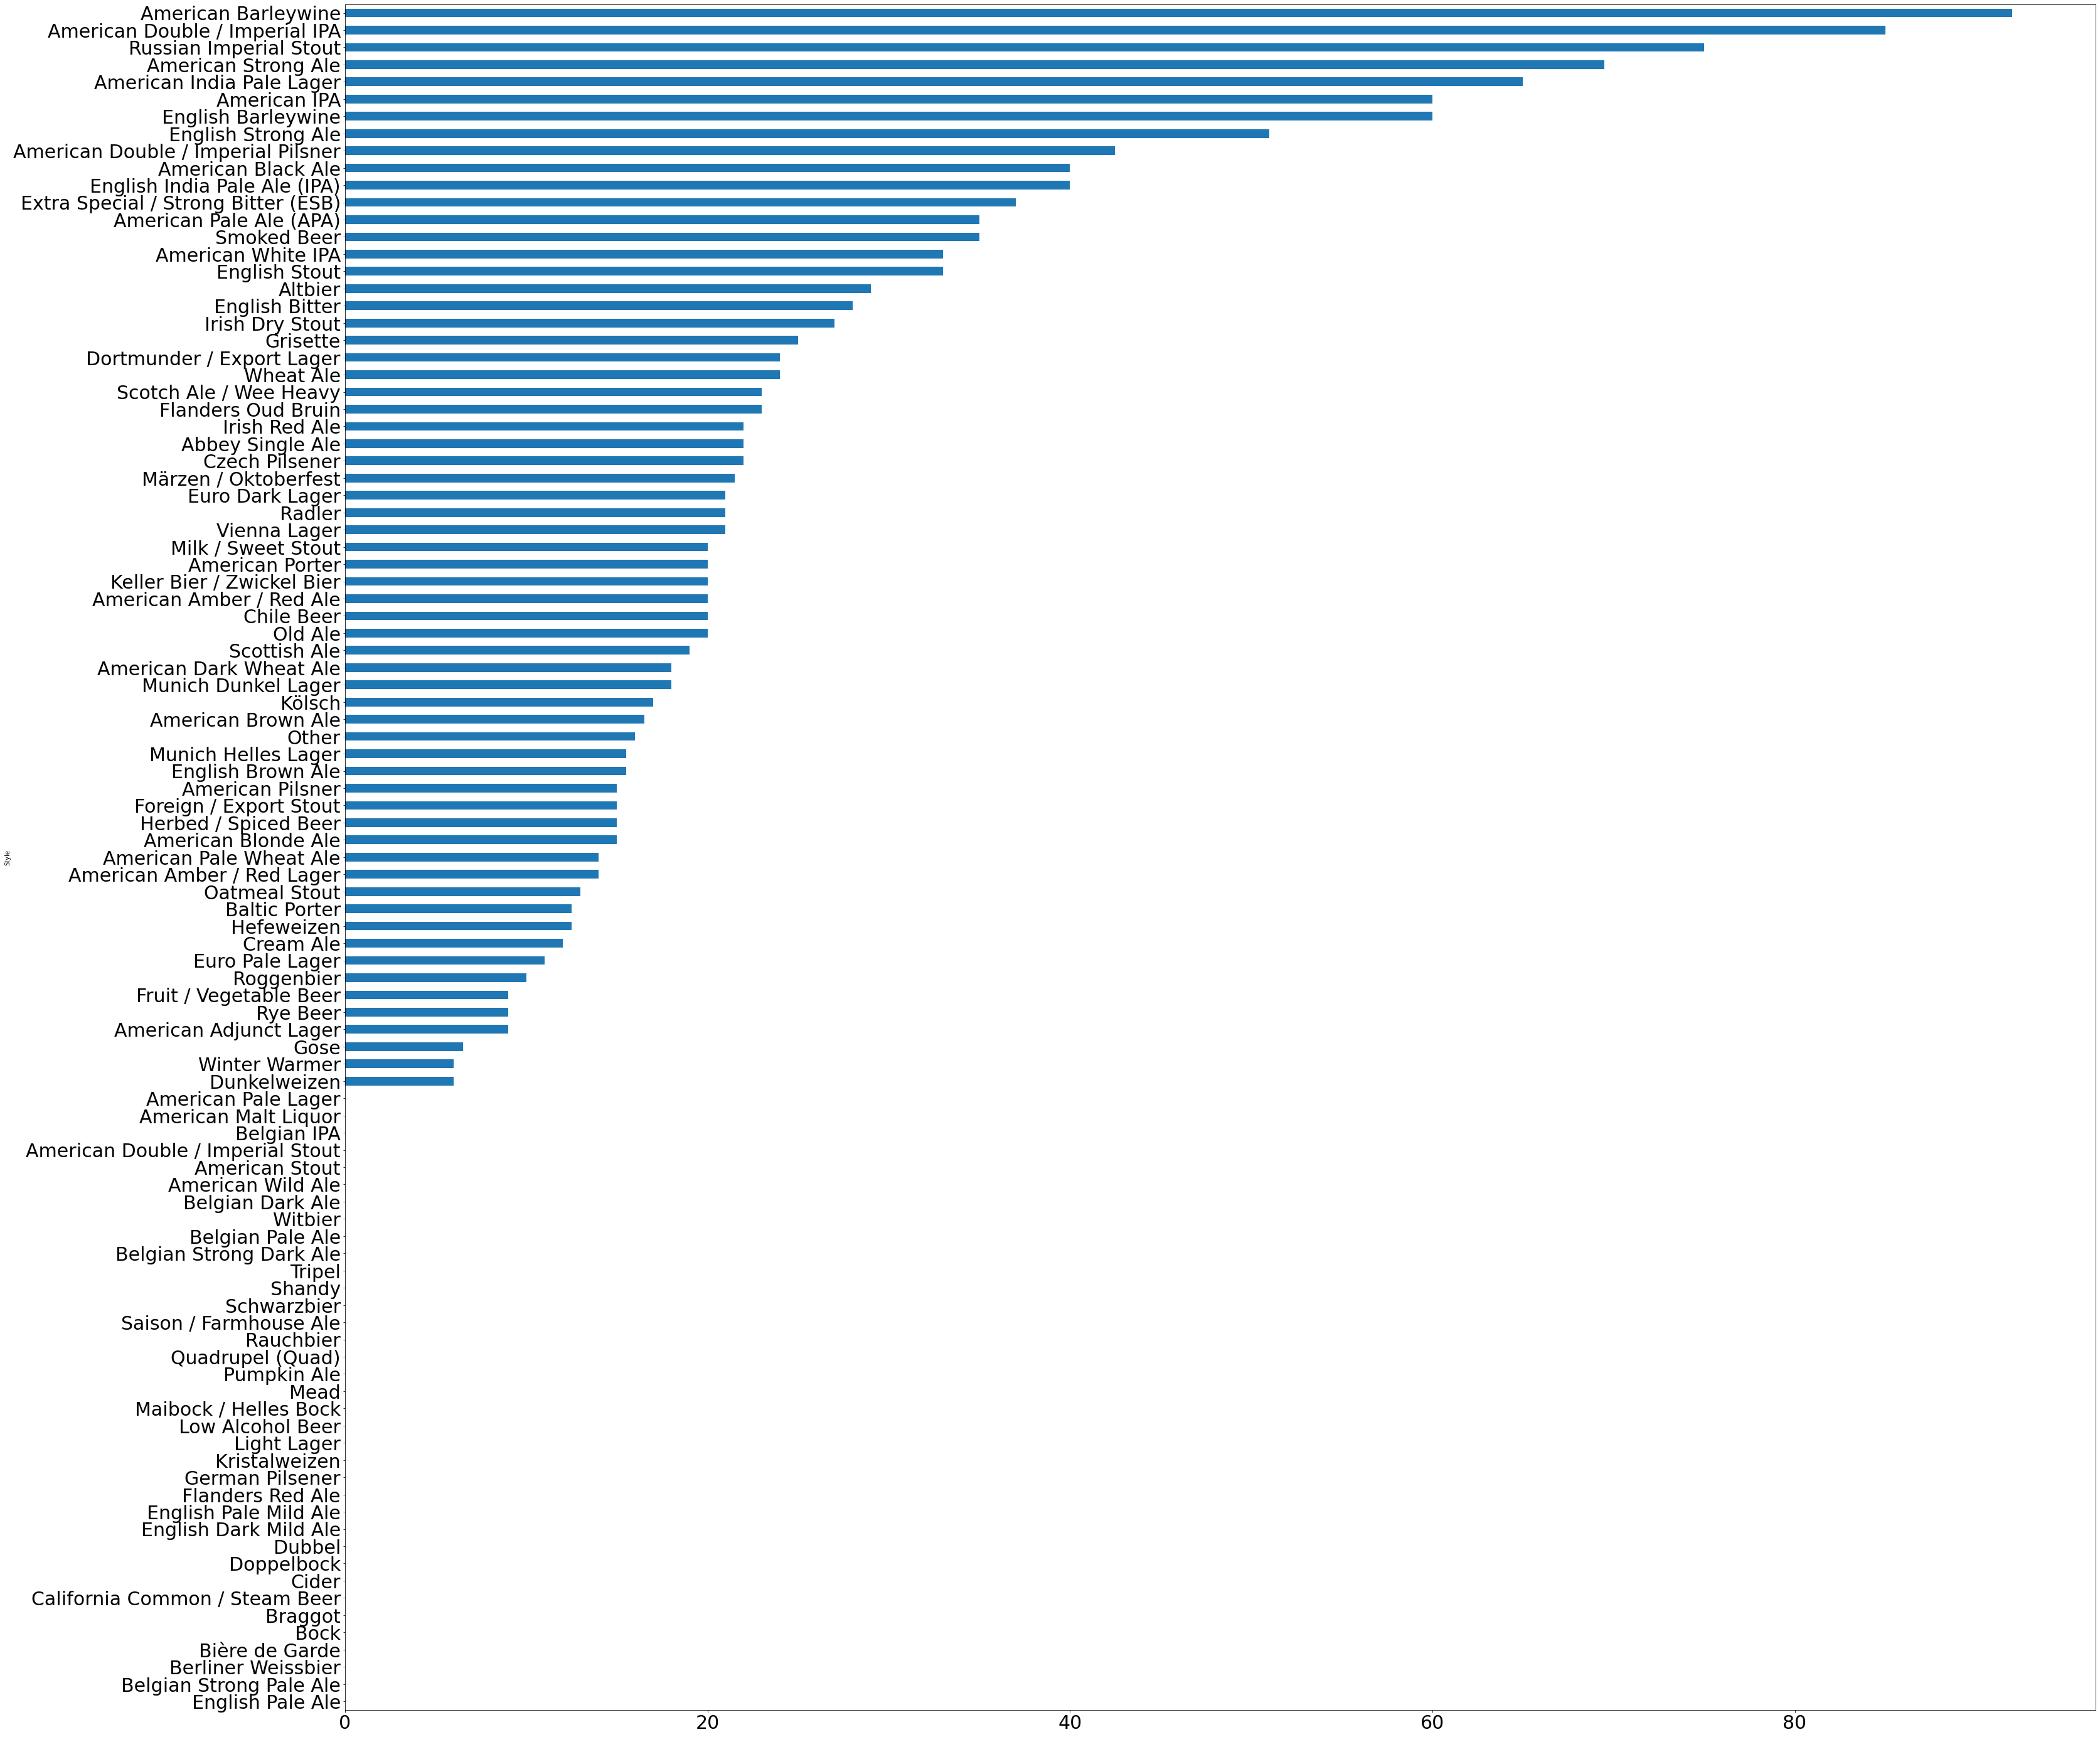

In [308]:
df.groupby('Style').IBUs.median().sort_values(na_position='last',ascending = True).plot(kind='barh',figsize = (50, 50),fontsize =30 )

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [309]:
df[df.IBUs > 41].Style.value_counts().head(5)

American IPA                      285
American Pale Ale (APA)            89
American Double / Imperial IPA     74
American Amber / Red Ale           20
American Black Ale                 18
Name: Style, dtype: int64

In [310]:
df[(df.IBUs > 0) & (df.IBUs <= 18)].Style.value_counts().head(5)

American Pale Wheat Ale    27
Fruit / Vegetable Beer     24
American Blonde Ale        22
Hefeweizen                 21
Witbier                    17
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [311]:
df[df.Style.isin(['Witbier','Hefeweizen', 'American Pale Wheat Ale'])].IBUs.mean().round(2)

11.31

## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

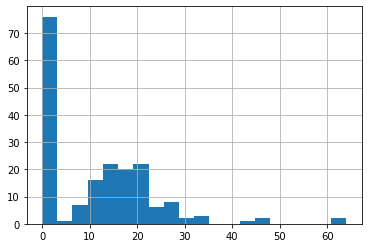

In [312]:
df[df.Style.isin(['Witbier','Hefeweizen', 'American Pale Wheat Ale'])].IBUs.hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [313]:
df[df.Style.str.contains(".*IPA.*", na= False)].IBUs.mean().round(2)

49.39

<AxesSubplot:>

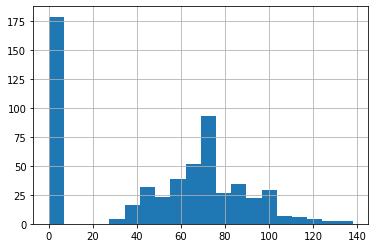

In [314]:
df[df.Style.str.contains(".*IPA.*", na= False)].IBUs.hist(bins=20)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

<AxesSubplot:>

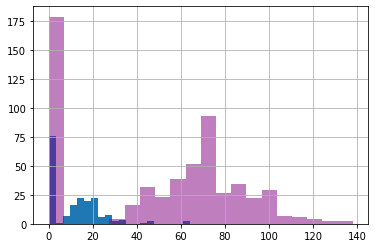

In [315]:
ax= df[df.Style.isin(['Witbier','Hefeweizen', 'American Pale Wheat Ale'])].IBUs.hist(bins=20)
df[df.Style.str.contains(".*IPA.*", na= False)].IBUs.hist(ax=ax, bins=20, alpha=0.5, color='purple' )

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [356]:
wheat_beer= df[df.Style.isin(['Witbier','Hefeweizen', 'American Pale Wheat Ale'])]
IPA_beer=df[df.Style.str.contains(".*IPA.*", na= False)]

wheat_beer_ABV= wheat_beer.ABV.mean().round(2)
IPA_beer_ABV = IPA_beer.ABV.mean().round(2)

wheat_beer_IBUs = wheat_beer.IBUs.mean().round(2)
IPA_beer_IBUs = IPA_beer.IBUs.mean().round(2)


In [361]:
print(f"wheat beer ABV is {wheat_beer_ABV}, IPA beer ABV is {IPA_beer_ABV}.")


print(f"wheat beer IBUs is {wheat_beer_IBUs},IPA beer IBUs is {IPA_beer_IBUs}.")

wheat beer ABV is 5.04, IPA beer ABV is 6.88.
wheat beer IBUs is 11.31,IPA beer IBUs is 49.39.


## Good work!

If you made it this far you deserve a drink.